In [1]:
# GRADER_ONLY
autograded_result = {
    "netid": None,
    "order": [],
    "student_score": 0,
    "total_available": 0,
    "breakdown": {}
}

def record_part(part_name, did_pass, available_points, message=""):
    global autograded_result
    
    # If already graded, remove previous graded order entry for this part
    if part_name in autograded_result["order"]:
        print("[Warning] Autograder: Part already graded or a duplicate key exists")
        autograded_result["order"].remove(part_name)
    
    # Record graded order
    autograded_result["order"].append(part_name)
    
    # Add graded result for this part
    autograded_result["breakdown"][part_name] = {
        "available_points": available_points,
        "points": available_points if did_pass else 0,
        "did_pass": did_pass,
        "message": message,
    }
    
    # Recalculate total_points and total_available points
    autograded_result["student_score"] = 0
    autograded_result["total_available"] = 0
    
    for part_info in autograded_result["breakdown"].values():
        autograded_result["student_score"] += part_info["points"]
        autograded_result["total_available"] += part_info["available_points"]
    
    print(autograded_result)

# Anaylze Airbnb Listings using SQL

- 🏆 80 points available
- 🤠 Author: Park (ypark32@illinois.edu)
- ✏️ Last updated on 10/26/2021

---

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [2]:
# DO NOT MODIFY THE CODE IN THIS CELL
import base64
import unittest
tc = unittest.TestCase()

assignment_name = "case-study-02-airbnb-listings"
is_autograder_env = 'record_part' in globals().keys()

if is_autograder_env:
    autograded_result["assignment_name"] = assignment_name

### 🎯 Enter your NetID

- 👇 Fill in the value of `netid` with your **NetID** below.
    - This value will be used by the autograder.

In [3]:
netid = ""

print(f"Your NetID is {netid}.")

Your NetID is .


In [4]:
# GRADER_ONLY
# This code will be stripped to the student-distributed version
netid = "grader_netid"

#### 🧭 Check Your NetID

If the code cell below doesn't throw an error, you're ready to begin this assignment.

In [5]:
# DO NOT CHANGE THE CODE BELOW
tc.assertIsNotNone(netid)
tc.assertIsInstance(netid, str)
tc.assertNotEqual(netid.strip(), "", "Did you forget to enter your NetID?")
tc.assertFalse(netid.strip().isdecimal(), "Did you enter your UIN instead of your NetID?")

if is_autograder_env:
    autograded_result["netid"] = netid

---

## 💎 Case overview

![Airbnb logo](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/airbnb-logo-black-background.png?raw=true)

[Airbnb](https://airbnb.com/) is a popular platform for hosts to accommodate guests with short-term stays and leisure activities. It was born in 2008 when the two founders welcomed three guests to their San Francisco home. Airbnb has grown to serve 4 million hosts in about 100,000 cities. That makes Airbnb's valuation worth more than top three hotel chains combined as of December 2020 ([source](https://www.businessinsider.com/airbnb-ipo-valuation-tops-three-hotel-chains-combined-opening-day-2020-12)).

### ⚔️ Your goal

You have recently joined a property management firm as a business development manager. Your role is to establish and deepen relationships with property owners. Your success on building relationships largely depends on the firm's ability to offer value-adding services to the property owners.

A common concern that most property owners face is dealing with vacant properties. The traditional approach to to fill up vacant properties is to run paid advertisements or to provide sign-up incentives (e.g., free rent for a month if leased for 13+ months, gift cards, referral bonus, free parking). You have a better idea - why not convert some of the vacant properties into vacation rentals?

In this case study, you'll use SQL analyze all Airbnb listings in the city your firm is operating in. Below are some of the questions you'll be answering.

- 👉 Are there properties that can accommodate more than 8 guests?
- 👉 Are there properties that target guests staying over a month?
- 👉 Are there properties that have more than 5 bedrooms and 3 bathrooms?
- 👉 What are the average price, occupancy (availability), and review score by room type?
- 👉 Can you calculate the metrics of interest (number of listings, average price, average occupancy, average review score) by the number of bedrooms?
- 👉 How about by neighbourhoods? Can you also find the average property dimensions (number of bedrooms & bathrooms)?
- 👉 How do the metrics and dimensions differ between superhost and non-superhost listings?
- 👉 Can you find all listings that were never booked?
- 👉 Can you find the top 15 highest-rated listings?
- 👉 Can you find listings with the keyword "bright"?

Note that looking at *just* the listings data is not sufficient to determine whether converting a vacant property to an Airbnb listing is a good idea. The analysis you perform here is preliminary. If you'd like, you can download additional booking data at [http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html) to go further on your own.

---

### 🎯 Part 1: Choose a city 🌄

Guess what - you get to pick your own city! 😺 

Go to [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1Yv3acCW6NYgcwVVo55TcgQ-aXcAsSmoVo_Su79xm9Js/edit?usp=sharing) and mark your NetID in any row where the city has not been taken yet (the selection is based on a first-come, first-served basis). You can pick a city that you're not familiar with. Copy the URL and replace the `file_url` below.

In [6]:
# Replace the URL below with the file_url in the Google spreadsheet
file_url = 'https://github.com/bdi475/datasets/raw/main/case-studies/airbnb-sql/YourCitySelection.csv'

In [7]:
# GRADER_ONLY
file_url = 'https://github.com/bdi475/datasets/raw/main/case-studies/airbnb-sql/HongKong.csv'

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [8]:
# DO NOT CHANGE THE CODE IN THIS CELL
import pandas as pd

# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-01"
did_pass = True
available_points = 2
message = ""

try:
    df_check = pd.read_csv(file_url)

    tc.assertEqual(set(df_check.columns), set(['name', 'neighbourhood', 'room_type', 'bedrooms', 'bathrooms', 
                                               'accommodates', 'minimum_nights', 'price', 'availability_365', 
                                               'number_of_reviews', 'review_score', 'latitude', 'longitude', 'is_superhost']))

    tc.assertGreater(df_check.shape[0], 100, 'The city should have at least 100 listings')
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01'], 'student_score': 2, 'total_available': 2, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


---

### 🎯 Part 2: Import packages

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.
    3. `sqlite3`: No alias

In [9]:
# YOUR CODE BEGINS
import pandas as pd
import numpy as np
import sqlite3
# YOUR CODE ENDS

#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [10]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-02"
did_pass = True
available_points = 2
message = ""

import sys

try:
    tc.assertIsNotNone(pd.__version__, 'Check whether you have correctly imported Pandas with an alias.')
    tc.assertIsNotNone(np.__version__, 'Check whether you have correctly imported NumPy with an alias.')
    tc.assertTrue('sqlite3' in globals(), 'Check whether you have correctly imported the sqlite3 package.')
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02'], 'student_score': 4, 'total_available': 4, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


---

### 🔨 Create and populate the `listings` table

▶️ Run the code below to create a new SQLite database. The code will also create and populate the `listings` table.

In [11]:
# DO NOT CHANGE THE CODE BELOW
# Connect to airbnb.db database file
# If the file does not exist, create a new file
conn = sqlite3.connect('airbnb.db')

# Create a cursor
# A cursor enables users of a DBMS to traverse through the result set
# without having to retrieve all results at once
c = conn.cursor()

# Drop (delete) listings table if it already exists
c.execute('DROP TABLE IF EXISTS listings')
conn.commit()

# Create table
# Triple quotes (''') denote multiline strings
create_table_query = '''
CREATE TABLE IF NOT EXISTS listings (
    name TEXT,
    neighbourhood TEXT,
    room_type TEXT,
    bedrooms REAL,
    bathrooms REAL,
    price REAL,
    accommodates INT,
    minimum_nights INT,
    availability_365 INT,
    number_of_reviews INTEGER,
    review_score REAL,
    is_superhost INT,
    latitude REAL,
    longitude REAL
)
'''
c.execute(create_table_query)
conn.commit()

# Populate the listings table
df_listings = pd.read_csv(file_url)
df_listings.to_sql(name='listings', index=False, con=conn, if_exists='append')

conn.close()

#### 🔬 `listings` table column descriptions

| Column Name         | Description                                                              |
|---------------------|--------------------------------------------------------------------------|
| `name`              | Listing title                                                            |
| `neighbourhood`     | Neighbourhood                                                            |
| `room_type`         | Room type (e.g., Shared room, Private room, Entire home/apt, Hotel room) |
| `bedrooms`          | Number of bedrooms                                                       |
| `bathrooms`         | Number of bathrooms                                                      |
| `accommodates`      | Number of maximum guests                                                 |
| `minimum_nights`    | Number of minimum nights required to book                                |
| `price`             | Base nightly price - the actual price will vary by specific dates        |
| `availability_365`  | Number of available days during the past 365 days                        |
| `number_of_reviews` | Total number of reviews                                                  |
| `review_score`      | Guest feedback rating                                                    |
| `latitude`          | Latitude                                                                 |
| `longitude`         | Longitude                                                                |
| `is_superhost`      | Whether the host is a superhost (0 == not a superhost, 1 == superhost)   |

---

### 🎯 Part 3: Select all columns and rows from the `listings` table

#### 👇 Tasks

- ✔️ Write a query that selects all columns and rows from the `listings` table.
- ✔️ Store your query to a new variable named `query_select_all`.

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [12]:
# YOUR CODE BEGINS
query_select_all = '''
SELECT *
FROM listings
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_select_all, con=conn)
display(df_result)
conn.close()

,name,neighbourhood,room_type,bedrooms,bathrooms,price,accommodates,minimum_nights,availability_365,number_of_reviews,review_score,is_superhost,latitude,longitude
0,Beautiful oasis of plants & art @ best location,Central & Western,Entire home/apt,1.0,1.0,1135.0,3,3,174,134,97.0,1,22.28352,114.15018
1,Central Centre 5 min walk to/from Central MTR,Central & Western,Entire home/apt,2.0,1.0,613.0,6,2,365,272,89.0,0,22.28407,114.15570
2,Entire Flat - Next to Man Mo Temple,Central & Western,Entire home/apt,1.0,1.5,2631.0,2,1,365,14,93.0,0,22.28222,114.14834
3,Fabulous 2 Bdrm Aprt Open kitchen,Central & Western,Entire home/apt,2.0,1.0,845.0,6,2,365,207,93.0,0,22.28868,114.14494
4,Soho off Hollywood Road P4,Central & Western,Entire home/apt,2.0,1.0,613.0,6,2,364,224,86.0,0,22.28651,114.14874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,Sunlight Studio w/ Netflix😉 🖥(9分鐘到太子奧運),Yau Tsim Mong,Entire home/apt,1.0,1.5,321.0,2,1,1,24,90.0,0,22.32355,114.16340
1627,2Bedroom Mongkok MTR E1 exit,Yau Tsim Mong,Entire home/apt,2.0,1.0,553.0,8,4,71,11,96.0,0,22.31743,114.16742
1628,Cosy flat near the Kite Surf beach on Lantau,Islands,Entire home/apt,2.0,1.0,650.0,6,2,66,10,100.0,1,22.22198,113.91289
1629,兩房兩廁 地鐵口旁邊大客廳公寓,Yau Tsim Mong,Entire home/apt,2.0,2.0,1284.0,7,1,175,28,97.0,0,22.29513,114.17315


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [13]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-03"
did_pass = True
available_points = 3
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(b'ClNFTEVDVCAqCkZST00gbGlzdGluZ3MK').decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03'], 'student_score': 7, 'total_available': 7, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


#### 🚀 Hint

The query below selects all rows and columns from a database table named `my_table`.

```sql
SELECT *
FROM my_table;
```

---

### 🎯 Part 4: Listings that can accommodate 8 or more people

#### 👇 Tasks

- ✔️ Using the `listings` table, find all listings that can accommodate 8 or more people (`accommodates >= 8`).
- ✔️ Select only the following 5 columns (in the same order):
    - `name`, `room_type`, `bedrooms`, `bathrooms`, `accommodates`
- ✔️ Store your query to a new variable named `query_eight_or_more`.
- ✔️ Sort the result by `accommodates` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   |                                       name |       room_type | bedrooms | bathrooms | accommodates |
|--:|-------------------------------------------:|----------------:|---------:|----------:|-------------:|
| 0 |   Elegant Rantoul Oasis: 20 mins to campus | Entire home/apt |      5.0 |       4.0 |           14 |
| 1 |         Exquisite 1980's Historic Building | Entire home/apt |      2.0 |       2.0 |           10 |
| 2 | Quiet Area in Urbana - Perfect for Groups! | Entire home/apt |      3.0 |       2.0 |            8 |
| 3 |     Spacious Champaign Apt w/Pool Gym Wifi | Entire home/apt |      1.0 |       1.0 |            7 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [14]:
# YOUR CODE BEGINS
query_eight_or_more = '''
SELECT name, room_type, bedrooms, bathrooms, accommodates
FROM listings
WHERE accommodates >= 8
ORDER BY accommodates DESC
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_eight_or_more, con=conn)
display(df_result)
conn.close()

,name,room_type,bedrooms,bathrooms,accommodates
0,"7BedR + 5BathR @ Hennessy Road 09/F 1,160SF",Entire home/apt,7.0,4.5,16
1,Air hotel. Licensed in Causeway Bay Hotel,Private room,9.0,6.0,16
2,Entire House 4 BR & 4 T/B (8-16pax),Entire home/apt,4.0,4.0,16
3,★9Bd/ 3Apt Whole Building in LKF with ROOFTOP★,Entire home/apt,3.0,3.0,16
4,L'etoile de Mer TST 海之星宿 尖沙咀 Single Female Cap...,Hotel room,1.0,2.5,16
...,...,...,...,...,...
149,旺角東鐵路站吃喝玩樂中心，獨立私人大廳3房1廁，monk Kok mtr D3 exit,Entire home/apt,3.0,1.0,8
150,Sealand GuestHouse- 西班牙式屋宇，二樓全層，三房一廳，鄰近寶蓮寺及大澳,Entire home/apt,3.0,1.0,8
151,世外桃源，陽光與海灘。 A Hidden Gem in HK. Beach and Suns...,Entire home/apt,3.0,1.0,8
152,綠色生活，隱世沙灘 Green Life. Hidden Gem. Beach &Suns...,Entire home/apt,3.0,1.0,8


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [15]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-04"
did_pass = True
available_points = 3
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCBuYW1lLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsIGFjY29tbW9kYXRlcwp\
    GUk9NIGxpc3RpbmdzCldIRVJFIGFjY29tbW9kYXRlcyA+PSA4Ck9SREVSIEJZIGFjY29tbW9kYXRlcyBERVNDCg=='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['accommodates'].reset_index(drop=True),
                                   df_check['accommodates'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04'], 'student_score': 10, 'total_available': 10, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


#### 🚀 Hint

The query below selects 5 columns from `my_table` where `column5` is greater than or equal to 8. The result will be sorted by `column5` in descending order.

```sql
SELECT column1, column2, column3, column4, column5
FROM my_table
WHERE column5 >= 8
ORDER BY column5 DESC;
```

---

### 🎯 Part 5: Average price of all listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the average price of all listings:
- ✔️ Store your query to a new variable named `query_avg_price`.
- ✔️ Result of your query should have only one column and one row.
    - The name of the column does not matter.
    
#### 🔑 Output Format

You are free to rename your `AVG(price)` column.

|   |      AVG(price) |
|--:|----------------:|
| 0 |      145.666667 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [16]:
# YOUR CODE BEGINS
query_avg_price = '''
SELECT AVG(price)
FROM listings;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_avg_price, con=conn)
display(df_result)
conn.close()

,AVG(price)
0,755.454323


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [17]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-05"
did_pass = True
available_points = 4
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
        b'ClNFTEVDVCBBVkcocHJpY2UpCkZST00gbGlzdGluZ3MK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    tc.assertEqual(df_result.iloc[0, 0], df_check.iloc[0, 0], f'Average price should be {df_check.iloc[0, 0]}')
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05'], 'student_score': 14, 'total_available': 14, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


#### 🚀 Hint

The query below calculates the average of `my_column` in `my_table`.

```sql
SELECT AVG(my_column)
FROM my_table;
```

---

### 🎯 Part 6: Long-term stays

#### 👇 Tasks

- ✔️ Using the `listings` table, find all listings with minimum nights of 30 or more (`minimum_nights >= 30`).
- ✔️ Select only the following 7 columns (in the same order):
    - `name`, `room_type`, `bedrooms`, `bathrooms`, `minimum_nights`, `price`, `review_score`
- ✔️ Store your query to a new variable named `query_long_term_stays`.
- ✔️ Sort the result by `price` in ascending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | name                                      | room_type    | bedrooms | bathrooms | minimum_nights | price | review_score |
|---|-------------------------------------------|--------------|----------|-----------|----------------|-------|--------------|
| 0 | Peace within the city for solo travelers  | Private room | 1.0      | 1.0       | 35             | 25.0  | 95.0         |
| 1 | Room close to Downtown Champaign          | Private room | 1.0      | 1.0       | 30             | 33.0  | 95.0         |
| 2 | Perfect spot to work on your next startup | Private room | 1.0      | 1.0       | 30             | 65.0  | 98.0         |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [18]:
# YOUR CODE BEGINS
query_long_term_stays = '''
SELECT name, room_type, bedrooms, bathrooms, minimum_nights, price, review_score
FROM listings
WHERE minimum_nights >= 30
ORDER BY price;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_long_term_stays, con=conn)
display(df_result)
conn.close()

,name,room_type,bedrooms,bathrooms,minimum_nights,price,review_score
0,"111 邻近香港諾富特世紀酒店, 雅思考場和地鐵站口的超私隐女子太空舱小天地+共享空间",Private room,1.0,2.0,30,96.0,96.0
1,Convenient/MTR5min/central located/prince Edward,Shared room,1.0,1.0,45,150.0,96.0
2,銅鑼灣地鐵港風持牌旅舍Causeway bay MTR licenced guesthou...,Private room,1.0,1.0,30,177.0,93.0
3,"Quarry Bay Studio! 15mins to Central, Causeway...",Entire home/apt,1.0,1.0,30,180.0,97.0
4,"Quarry Bay Studio [Island line, 15mins to Cent...",Entire home/apt,1.0,1.0,30,200.0,92.0
5,Close to the metro Private room with elevator,Entire home/apt,1.0,1.5,90,229.0,89.0
6,月租近地鐵站独立卫浴有電梯Wi-Fi獨立單間,Entire home/apt,1.0,1.5,30,229.0,87.0
7,銅鑼灣羅馬假日賓館,Private room,1.0,1.0,30,250.0,87.0
8,House of Nomad A.,Private room,1.0,1.0,30,315.0,93.0
9,FULLY FURNISHED STUDIO B IN TSIM SHA TSUI 尖沙咀6B,Entire home/apt,1.0,1.0,90,333.0,86.0


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [19]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-06"
did_pass = True
available_points = 4
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCBuYW1lLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsIG1pbmltdW1fbmlnaHRz\
    LCBwcmljZSwgcmV2aWV3X3Njb3JlCkZST00gbGlzdGluZ3MKV0hFUkUgbWluaW11bV9uaWdodHMgPj0gMzAKT1JERVIgQlkgcHJpY2UK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['price'].reset_index(drop=True),
                                   df_check['price'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06'], 'student_score': 18, 'total_available': 18, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


#### 🚀 Hint

The query below selects 7 columns from `my_table` where `column5` is greater than or equal to 30. The result will be sorted by `column6` in ascending order.

```sql
SELECT column1, column2, column3, column4, column5, column6, column7
FROM my_table
WHERE column5 >= 30
ORDER BY column6;
```

---

### 🎯 Part 7: Large listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find all rows where the listing has:
    - 6 or more bedrooms
    - **AND** 4 or more bathrooms
- ✔️ Select only the following 5 columns (in the same order):
    - `name`, `bedrooms`, `bathrooms`, `price`, `review_score`
- ✔️ Store your query to a new variable named `query_large_listings`.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.


|   |                                   name | bedrooms | bathrooms | price | review_score |
|--:|---------------------------------------:|---------:|----------:|------:|-------------:|
| 0 |     5 min away from Downtown Champaign |      6.0 |       4.0 | 550.4 |         99.0 |
| 1 |   Large Bedroom & Bath close to campus |      6.0 |       5.0 | 483.0 |         98.0 |
| 2 | Big family welcomed, graduation season |      6.0 |       4.5 | 379.9 |         94.0 |
| 3 |                   LARGEST HOME IN TOWN |      8.0 |       7.0 | 600.0 |         93.0 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [20]:
# YOUR CODE BEGINS
query_large_listings = '''
SELECT name, bedrooms, bathrooms, price, review_score
FROM listings
WHERE (bedrooms >= 6) AND (bathrooms >= 4);
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_large_listings, con=conn)
display(df_result)
conn.close()

,name,bedrooms,bathrooms,price,review_score
0,"7BedR + 5BathR @ Hennessy Road 09/F 1,160SF",7.0,4.5,4690.0,91.0
1,Air hotel. Licensed in Causeway Bay Hotel,9.0,6.0,380.0,95.0


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [21]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-07"
did_pass = True
available_points = 4
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCBuYW1lLCBiZWRyb29tcywgYmF0aHJvb21zLCBwcmljZSwgcmV2aWV3X3Njb3JlCkZST00gb\
    GlzdGluZ3MKV0hFUkUgKGJlZHJvb21zID49IDYpIEFORCAoYmF0aHJvb21zID49IDQpCg=='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07'], 'student_score': 22, 'total_available': 22, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


#### 🚀 Hint

The query below selects 5 columns from `my_table` where `column2` is greater than or equal to 6 and `column3` is greater than or equal to 4.

```sql
SELECT column1, column2, column3, column4, column5
FROM my_table
WHERE (column2 >= 6) AND (column3 >= 4);
```

---

### 🎯 Part 8: Average price of large listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the average price of listings with:
    - 6 or more bedrooms
    - **AND** 4 or more bathrooms
- ✔️ Store your query to a new variable named `query_large_listings_avg_price`.
- ✔️ The result of your query should have only one column and one row.
    - The name of the column does not matter.
    
#### 🔑 Output Format

Your query result may have a different column name.

|   | AVG(price) |
|--:|-----------:|
| 0 |      475.5 |


#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [22]:
# YOUR CODE BEGINS
query_large_listings_avg_price = '''
SELECT AVG(price)
FROM listings
WHERE (bedrooms >= 6) AND (bathrooms >= 4)
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_large_listings_avg_price, con=conn)
display(df_result)
conn.close()

,AVG(price)
0,2535.0


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [23]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-08"
did_pass = True
available_points = 5
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
        b'ClNFTEVDVCBBVkcocHJpY2UpCkZST00gbGlzdGluZ3MKV0hFUkUgKGJlZHJvb21zID49IDYpIEFORCAoYmF0aHJvb21zID49IDQpCg=='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    tc.assertEqual(df_result.iloc[0, 0], df_check.iloc[0, 0], f'Average price should be {df_check.iloc[0, 0]}')
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08'], 'student_score': 27, 'total_available': 27, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


#### 🚀 Hint

The query below calculates the average of `column4` where `column2` is greater or equal to 6 and `column3` is greater or equal to 4.

```sql
SELECT AVG(column4)
FROM my_table
WHERE (column2 >= 6) AND (column3 >= 4);
```

---

### 🎯 Part 9: Number of listings by neighbourhood

#### 👇 Tasks

- ✔️ Using the `listings` table, find the number of listings by `neighbourhood`.
- ✔️ Store your query to a new variable named `query_num_listings_by_neighbourhood`.
- ✔️ The result of your query should have the following two columns:
    - `neighbourhood`
    - `num_listings`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings |
|--:|--------------:|-------------:|
| 0 |     Champaign |           60 |
| 1 |        Urbana |           50 |
| 2 |         Savoy |           30 |
| 3 |        Fisher |           20 |

#### 🔥 No hint

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [24]:
# YOUR CODE BEGINS
query_num_listings_by_neighbourhood = '''
SELECT neighbourhood, COUNT(*) AS num_listings
FROM listings
GROUP BY neighbourhood
ORDER BY num_listings DESC;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_num_listings_by_neighbourhood, con=conn)
display(df_result)
conn.close()

,neighbourhood,num_listings
0,Yau Tsim Mong,927
1,Wan Chai,178
2,Central & Western,148
3,Islands,127
4,Kowloon City,54
5,Sai Kung,38
6,North,37
7,Sham Shui Po,25
8,Eastern,23
9,Yuen Long,20


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [25]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-09"
did_pass = True
available_points = 5
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCBuZWlnaGJvdXJob29kLCBDT1VOVCgqKSBhcyBudW1fbGlzdGluZ3MKRlJPTSBsaXN0aW\
    5ncwpHUk9VUCBCWSBuZWlnaGJvdXJob29kCk9SREVSIEJZIG51bV9saXN0aW5ncyBERVNDOwo='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                                   df_check['num_listings'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09'], 'student_score': 32, 'total_available': 32, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}}, 'assignment_name': 'case-study-2-airbnb-listings'}


#### 🚀 Hint

Assuming that the `listings` table has a `city` column, the query below counts the number of listings for each `city`. It sorts the result by `num_listings` in descending order.

```sql
SELECT city, COUNT(*) AS num_listings
FROM listings
GROUP BY city
ORDER BY num_listings DESC;
```

---

### 🎯 Part 10: Number of superhost/non-superhost listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the number of listings of superhost/non-superhost.
- ✔️ Store your query to a new variable named `query_num_listings_by_host_status`.
- ✔️ The result of your query should have the following two columns:
    - `is_superhost`: `0` or `1`
    - `num_listings`
- ✔️ Sort the result by `is_superhost` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values.


|   | is_superhost | num_listings |
|--:|-------------:|-------------:|
| 0 |            0 |          500 |
| 1 |            1 |          400 |

#### 💣 No hint

Try this one on your own!

In [26]:
# YOUR CODE BEGINS
query_num_listings_by_host_status = '''
SELECT is_superhost, COUNT(*) as num_listings
FROM listings
GROUP BY is_superhost
ORDER BY is_superhost;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_num_listings_by_host_status, con=conn)
display(df_result)
conn.close()

,is_superhost,num_listings
0,0,1263
1,1,368


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [27]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-10"
did_pass = True
available_points = 4
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
        b'ClNFTEVDVCBpc19zdXBlcmhvc3QsIENPVU5UKCopIGFzIG51bV9saXN0aW5ncwpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIGlzX3N1cGVyaG9zdApPUkRFUiBCWSBpc19zdXBlcmhvc3Q7Cg=='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['is_superhost'].reset_index(drop=True),
                                   df_check['is_superhost'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10'], 'student_score': 36, 'total_available': 36, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-10': {'available_points': 4, 'points': 4, 'did_pass

---

## 💵 Metrics of interest

In this part, you will analyze the key metrics of rental properties such as occupancy rate (`availability_365`), rental rates (`price`), and guest feedback (`review_score`).

---

### 🎯 Part 11: Metrics by room types

#### 👇 Tasks

- ✔️ Using the `listings` table, find the **averages** of following three columns by `room_type`:
    - `price`
    - `availability_365`
    - `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_room_type`.
- ✔️ The result of your query should have the following 4 columns (in the same order):
    - `room_type`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `avg_availability` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values and may have different number of rows.

|   |       room_type |  avg_price | avg_availability | avg_review_score |
|--:|----------------:|-----------:|-----------------:|-----------------:|
| 0 |     Shared room |  40.100000 |       162.821215 |        95.491510 |
| 1 |    Private room |  60.236737 |       189.997992 |        95.500100 |
| 2 | Entire home/apt | 104.599667 |       225.127593 |        92.105033 |
| 3 |      Hotel room |  66.666667 |       310.444444 |        88.666667 |


#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [28]:
# YOUR CODE BEGINS
query_metrics_by_room_type = '''
SELECT 
    room_type, 
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY room_type
ORDER BY avg_availability;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_room_type, con=conn)
display(df_result)
conn.close()

,room_type,avg_price,avg_availability,avg_review_score
0,Entire home/apt,1150.264567,184.365354,93.017323
1,Private room,486.698182,209.380606,91.372121
2,Hotel room,859.604167,231.635417,90.406250
3,Shared room,235.733333,281.146667,92.120000


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [29]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-11"
did_pass = True
available_points = 5
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
        b'ClNFTEVDVCAKICAgIHJvb21fdHlwZSwKICAgIEFWRyhwcmljZSkgQVMgYXZnX3ByaWNlLCAKICAgIEFWRyhhdmFpbGFiaWxpdHlfMzY1KSBBUyBhdmdfYXZhaWxhYmlsaXR5LCAKICAgIEFWRyhyZXZpZXdfc2NvcmUpIEFTIGF2Z19yZXZpZXdfc2NvcmUKRlJPTSBsaXN0aW5ncwpHUk9VUCBCWSByb29tX3R5cGUKT1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eTsK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                                   df_check['avg_availability'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11'], 'student_score': 41, 'total_available': 41, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-10': {'available_points': 4, 'points': 4

#### 🚀 Hint

Below is a **fully-functional** solution query. You do not have to change anything.

```sql
SELECT 
    room_type, 
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY room_type
ORDER BY avg_availability;
```

---

### 🎯 Part 12: Metrics by number of bedrooms

#### 👇 Tasks

- ✔️ Using the `listings` table, find the following measures by the number of bedrooms (`bedrooms`):
    - Count of rows (number of listings)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_bedrooms`.
- ✔️ The result of your query should have the following 5 columns (in the same order):
    - `bedrooms`
    - `num_listings`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `bedrooms` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values and may have different number of rows.

|   | bedrooms | num_listings |  avg_price | avg_availability | avg_review_score |
|--:|---------:|-------------:|-----------:|-----------------:|-----------------:|
| 0 |      1.0 |          524 |  95.839695 |       218.353053 |        94.398855 |
| 1 |      2.0 |          207 | 143.144928 |       202.579710 |        94.275362 |
| 2 |      3.0 |           98 | 227.326531 |       211.755102 |        96.285714 |
| 3 |      4.0 |           27 | 364.111111 |       205.592593 |        95.481481 |
| 4 |      5.0 |            9 | 491.555556 |       245.333333 |        95.666667 |
| 5 |      6.0 |            4 | 477.250000 |       262.500000 |        96.500000 |


#### 💣 No hint

Try this one on your own!

In [30]:
# YOUR CODE BEGINS
query_metrics_by_bedrooms = '''
SELECT 
    bedrooms,
    COUNT(*) AS num_listings,
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY bedrooms
ORDER BY bedrooms;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_bedrooms, con=conn)
display(df_result)
conn.close()

,bedrooms,num_listings,avg_price,avg_availability,avg_review_score
0,1.0,1253,537.396648,208.059058,91.592977
1,2.0,241,1362.842324,197.539419,93.199170
2,3.0,104,1550.096154,176.596154,93.701923
3,4.0,27,2268.111111,179.074074,93.333333
4,5.0,4,706.000000,361.750000,89.500000
5,7.0,1,4690.000000,1.000000,91.000000
6,9.0,1,380.000000,180.000000,95.000000


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [31]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-12"
did_pass = True
available_points = 6
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIGJlZHJvb21zLAogICAgQ09VTlQoKikgQVMgbnVtX2xpc3RpbmdzLAogICAgQVZHKHByaWN\
    lKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2YWlsYWJpbGl0eV8zNjUpIEFTIGF2Z19hdmFpbGFiaWxpdHksIAog\
    ICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY29yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIGJlZHJvb21zCk9SREVSIEJZIGJlZHJvb21zOwo='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                                   df_check['avg_availability'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12'], 'student_score': 47, 'total_available': 47, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-10': {'available_points': 4, 

---

### 🎯 Part 13: Metrics by neighbourhood

#### 👇 Tasks

- ✔️ Using the `listings` table, find the following measures by the neighbourhood (`neighbourhood`):
    - Count of rows (number of listings)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_neighbourhood`.
- ✔️ The result of your query should have the following 5 columns (in the same order):
    - `neighbourhood`
    - `num_listings`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings |  avg_price | avg_availability | avg_review_score |
|--:|--------------:|-------------:|-----------:|-----------------:|-----------------:|
| 0 |     Champaign |          107 | 120.299065 |       238.392523 |        93.504673 |
| 1 |        Urbana |           75 |  88.938776 |       197.938776 |        95.306122 |
| 2 |       Mahomet |           41 |  95.347826 |       237.304348 |        93.000000 |
| 3 |       Rantoul |           26 | 287.000000 |       195.166667 |        97.166667 |

#### 💣 No hint

Try this one on your own!

In [32]:
# YOUR CODE BEGINS
query_metrics_by_neighbourhood = '''
SELECT 
    neighbourhood,
    COUNT(*) AS num_listings,
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY neighbourhood
ORDER BY num_listings DESC;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_neighbourhood, con=conn)
display(df_result)
conn.close()

,neighbourhood,num_listings,avg_price,avg_availability,avg_review_score
0,Yau Tsim Mong,927,663.125135,218.349515,90.612729
1,Wan Chai,178,772.207865,176.522472,93.483146
2,Central & Western,148,1035.662162,190.722973,93.702703
3,Islands,127,1111.440945,151.094488,93.905512
4,Kowloon City,54,825.944444,208.111111,90.851852
5,Sai Kung,38,853.026316,189.210526,95.763158
6,North,37,846.729730,185.945946,96.162162
7,Sham Shui Po,25,483.520000,239.280000,92.560000
8,Eastern,23,492.782609,172.869565,93.695652
9,Yuen Long,20,495.450000,245.550000,95.650000


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [33]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-13"
did_pass = True
available_points = 6
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAg\
    ICBBVkcocHJpY2UpIEFTIGF2Z19wcmljZSwgCiAgICBBVkcoYXZhaWxhYmlsaXR5XzM2NSkgQVMgYXZnX2\
    F2YWlsYWJpbGl0eSwgCiAgICBBVkcocmV2aWV3X3Njb3JlKSBBUyBhdmdfcmV2aWV3X3Njb3JlCkZST00g\
    bGlzdGluZ3MKR1JPVVAgQlkgbmVpZ2hib3VyaG9vZApPUkRFUiBCWSBudW1fbGlzdGluZ3MgREVTQzsK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                                   df_check['num_listings'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13'], 'student_score': 53, 'total_available': 53, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-10': {'available_p

---

### 🎯 Part 14: Metrics by neighbourhood, expanded

#### 👇 Tasks
- ✔️ This time, you will include more details on the listing size (average number of bedrooms, bathrooms, accommodations).
- ✔️ Using the `listings` table, find the following measures by the neighbourhood (`neighbourhood`):
    - Count of rows (number of listings)
    - Average number of `bedrooms`
    - Average number of `bathrooms`
    - Average number of maximum guests (average of `accommodates`)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_details_by_neighbourhood`.
- ✔️ The result of your query should have the following 8 columns (in the same order):
    - `neighbourhood`
    - `num_listings`
    - `avg_bedrooms`,
    - `avg_bathrooms`,
    - `avg_accommodates`,
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings | avg_bedrooms | avg_bathrooms | avg_accommodates |  avg_price | avg_availability | avg_review_score |
|--:|--------------:|-------------:|-------------:|--------------:|-----------------:|-----------:|-----------------:|-----------------:|
| 0 |     Champaign |          107 |     1.736842 |      1.552632 |         4.771930 | 108.192982 |       186.982456 |        95.631579 |
| 1 |        Urbana |           75 |     1.500000 |      1.166667 |         3.666667 | 117.666667 |       212.666667 |        98.333333 |
| 2 |       Mahomet |           41 |     1.333333 |      1.500000 |         2.333333 |  49.000000 |        31.666667 |        98.333333 |
| 3 |       Rantoul |           26 |     1.000000 |      1.000000 |         2.000000 |  29.000000 |       322.500000 |        96.000000 |

#### 🔥 Need help?

The query will build upon the previous part and will be highly similar.

In [34]:
# YOUR CODE BEGINS
query_details_by_neighbourhood = '''
SELECT 
    neighbourhood,
    COUNT(*) AS num_listings,
    AVG(bedrooms) AS avg_bedrooms,
    AVG(bathrooms) AS avg_bathrooms,
    AVG(accommodates) AS avg_accommodates,
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY neighbourhood
ORDER BY num_listings DESC;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_details_by_neighbourhood, con=conn)
display(df_result)
conn.close()

,neighbourhood,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,Yau Tsim Mong,927,1.228695,1.193096,3.283711,663.125135,218.349515,90.612729
1,Wan Chai,178,1.544944,1.446629,4.370787,772.207865,176.522472,93.483146
2,Central & Western,148,1.324324,1.084459,2.939189,1035.662162,190.722973,93.702703
3,Islands,127,1.519685,1.161417,3.874016,1111.440945,151.094488,93.905512
4,Kowloon City,54,1.851852,1.425926,4.055556,825.944444,208.111111,90.851852
5,Sai Kung,38,1.473684,1.197368,2.973684,853.026316,189.210526,95.763158
6,North,37,1.594595,1.297297,3.405405,846.729730,185.945946,96.162162
7,Sham Shui Po,25,1.320000,1.260000,3.440000,483.520000,239.280000,92.560000
8,Eastern,23,1.260870,1.043478,2.521739,492.782609,172.869565,93.695652
9,Yuen Long,20,1.600000,1.325000,3.050000,495.450000,245.550000,95.650000


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [35]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-14"
did_pass = True
available_points = 6
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAgICBBVkcoYmVkcm9vbXMpI\
    GFzIGF2Z19iZWRyb29tcywKICAgIEFWRyhiYXRocm9vbXMpIGFzIGF2Z19iYXRocm9vbXMsCiAgICBBVkcoYWNjb21tb2RhdGVzKSBh\
    cyBhdmdfYWNjb21tb2RhdGVzLAogICAgQVZHKHByaWNlKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2YWlsYWJpbGl0eV8zNjUpIEF\
    TIGF2Z19hdmFpbGFiaWxpdHksIAogICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY29yZQpGUk9NIGxpc3RpbmdzCk\
    dST1VQIEJZIG5laWdoYm91cmhvb2QKT1JERVIgQlkgbnVtX2xpc3RpbmdzIERFU0M7Cg=='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                                   df_check['num_listings'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14'], 'student_score': 59, 'total_available': 59, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-10': {'

---

### 🎯 Part 15: Metrics by host status, expanded

#### 👇 Tasks
- ✔️ This time, you will repeat the previous analysis using `is_superhost` instead of `neighbourhood`.
- ✔️ Using the `listings` table, find the following measures by the host status (`is_superhost`):
    - Count of rows (number of listings)
    - Average number of `bedrooms`
    - Average number of `bathrooms`
    - Average number of maximum guests (average of `accommodates`)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_details_by_host_status`.
- ✔️ The result of your query should have the following 8 columns (in the same order):
    - `is_superhost`
    - `num_listings`
    - `avg_bedrooms`,
    - `avg_bathrooms`,
    - `avg_accommodates`,
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `is_superhost` in ascending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | is_superhost | num_listings | avg_bedrooms | avg_bathrooms | avg_accommodates |  avg_price | avg_availability | avg_review_score |
|--:|-------------:|-------------:|-------------:|--------------:|-----------------:|-----------:|-----------------:|-----------------:|
| 0 |            0 |          400 |     1.465113 |      1.630648 |         4.132415 | 132.887151 |       220.066667 |        93.015012 |
| 1 |            1 |          500 |     1.357654 |      1.554667 |         5.142551 | 144.887511 |       193.269997 |        97.425115 |

In [36]:
# YOUR CODE BEGINS
query_details_by_host_status = '''
SELECT 
    is_superhost,
    COUNT(*) AS num_listings,
    AVG(bedrooms) AS avg_bedrooms,
    AVG(bathrooms) AS avg_bathrooms,
    AVG(accommodates) AS avg_accommodates,
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY is_superhost
ORDER BY is_superhost;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_details_by_host_status, con=conn)
display(df_result)
conn.close()

,is_superhost,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,0,1263,1.351544,1.232383,3.506730,741.092637,210.646081,90.820269
1,1,368,1.315217,1.167120,3.081522,804.744565,182.304348,96.005435


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [37]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-15"
did_pass = True
available_points = 6
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIGlzX3N1cGVyaG9zdCwKICAgIENPVU5UKCopIEFTIG51bV9saXN0aW5ncywKICAgIEFWRyhiZWRyb29tcy\
    kgYXMgYXZnX2JlZHJvb21zLAogICAgQVZHKGJhdGhyb29tcykgYXMgYXZnX2JhdGhyb29tcywKICAgIEFWRyhhY2NvbW1vZGF0ZX\
    MpIGFzIGF2Z19hY2NvbW1vZGF0ZXMsCiAgICBBVkcocHJpY2UpIEFTIGF2Z19wcmljZSwgCiAgICBBVkcoYXZhaWxhYmlsaXR5Xz\
    M2NSkgQVMgYXZnX2F2YWlsYWJpbGl0eSwgCiAgICBBVkcocmV2aWV3X3Njb3JlKSBBUyBhdmdfcmV2aWV3X3Njb3JlCkZST00gbG\
    lzdGluZ3MKR1JPVVAgQlkgaXNfc3VwZXJob3N0Ck9SREVSIEJZIGlzX3N1cGVyaG9zdDsK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['is_superhost'].reset_index(drop=True),
                                   df_check['is_superhost'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14', 'part-15'], 'student_score': 65, 'total_available': 65, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'p

---

## 🐳 More queries!

In this part, you will try out queries that calculate metrics of interest by more than one criteria. In Pandas terms, this would be grouping by more than one column.

**The fully-working query for each part will be given to you.** Your task is to *try* to understand what each query does. 🐬

![SQL Query Meme](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/my-sql-query-meme-01.jpg?raw=true)

---

### 🎯 Part 16: Metrics by neighbourhood + room type

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_neighbourhood_room_type`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-neighbourhood-room-type-popularity-01.png?raw=true)

In [38]:
# YOUR CODE BEGINS
query_neighbourhood_room_type = '''
SELECT 
    neighbourhood,
    room_type,
    COUNT(*) AS num_listings,
    AVG(bedrooms) as avg_bedrooms,
    AVG(bathrooms) as avg_bathrooms,
    AVG(accommodates) as avg_accommodates,
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY neighbourhood, room_type
HAVING num_listings > 20
ORDER BY avg_availability
LIMIT 10;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_neighbourhood_room_type, con=conn)
display(df_result)
conn.close()

,neighbourhood,room_type,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,Islands,Entire home/apt,76,1.802632,1.223684,4.657895,1366.223684,143.539474,92.881579
1,Wan Chai,Private room,60,1.166667,1.200000,2.216667,447.733333,145.233333,93.366667
2,North,Entire home/apt,25,1.720000,1.380000,4.000000,1150.360000,161.440000,96.720000
3,Wan Chai,Entire home/apt,94,1.925532,1.356383,5.042553,1083.882979,162.702128,94.489362
4,Islands,Private room,47,1.106383,1.074468,2.659574,702.851064,173.340426,95.574468
5,Central & Western,Entire home/apt,107,1.392523,1.098131,3.392523,1232.224299,174.803738,93.327103
6,Sai Kung,Private room,26,1.038462,1.057692,1.846154,462.500000,187.884615,96.730769
7,Kowloon City,Entire home/apt,36,2.277778,1.458333,4.861111,1041.500000,190.083333,90.666667
8,Yau Tsim Mong,Entire home/apt,224,1.879464,1.220982,5.772321,1131.794643,203.281250,91.933036
9,Yau Tsim Mong,Private room,580,1.025862,1.067241,2.327586,486.822414,218.682759,90.025862


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [39]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-16"
did_pass = True
available_points = 3
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICByb29tX3R5cGUsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAg\
    ICBBVkcoYmVkcm9vbXMpIGFzIGF2Z19iZWRyb29tcywKICAgIEFWRyhiYXRocm9vbXMpIGFzIGF2Z19iYXRocm9vbXMsCiAgICBBVk\
    coYWNjb21tb2RhdGVzKSBhcyBhdmdfYWNjb21tb2RhdGVzLAogICAgQVZHKHByaWNlKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2\
    YWlsYWJpbGl0eV8zNjUpIEFTIGF2Z19hdmFpbGFiaWxpdHksIAogICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY2\
    9yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIG5laWdoYm91cmhvb2QsIHJvb21fdHlwZQpIQVZJTkcgbnVtX2xpc3RpbmdzID4gMjAK\
    T1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eQpMSU1JVCAxMDsK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                                   df_check['avg_availability'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14', 'part-15', 'part-16'], 'student_score': 68, 'total_available': 68, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': True, 'messag

---

### 🎯 Part 17: Rounded metrics by neighbourhood + room type

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_neighbourhood_room_type_rounded`.
- ✔️ The query below performs identical tasks to the previous deliverable, but rounds up the numbers to 1 decimal place.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-neighbourhood-room-type-popularity-rounded-01.png?raw=true)

In [40]:
# YOUR CODE BEGINS
query_neighbourhood_room_type_rounded = '''
SELECT 
    neighbourhood,
    room_type,
    COUNT(*) AS num_listings,
    ROUND(AVG(bedrooms), 1) AS avg_bedrooms,
    ROUND(AVG(bathrooms), 1) AS avg_bathrooms,
    ROUND(AVG(accommodates), 1) AS avg_accommodates,
    ROUND(AVG(price), 1) AS avg_price, 
    ROUND(AVG(availability_365), 1) AS avg_availability, 
    ROUND(AVG(review_score), 1) AS avg_review_score
FROM listings
GROUP BY neighbourhood, room_type
HAVING num_listings > 20
ORDER BY avg_availability
LIMIT 10;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_neighbourhood_room_type_rounded, con=conn)
display(df_result)
conn.close()

,neighbourhood,room_type,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,Islands,Entire home/apt,76,1.8,1.2,4.7,1366.2,143.5,92.9
1,Wan Chai,Private room,60,1.2,1.2,2.2,447.7,145.2,93.4
2,North,Entire home/apt,25,1.7,1.4,4.0,1150.4,161.4,96.7
3,Wan Chai,Entire home/apt,94,1.9,1.4,5.0,1083.9,162.7,94.5
4,Islands,Private room,47,1.1,1.1,2.7,702.9,173.3,95.6
5,Central & Western,Entire home/apt,107,1.4,1.1,3.4,1232.2,174.8,93.3
6,Sai Kung,Private room,26,1.0,1.1,1.8,462.5,187.9,96.7
7,Kowloon City,Entire home/apt,36,2.3,1.5,4.9,1041.5,190.1,90.7
8,Yau Tsim Mong,Entire home/apt,224,1.9,1.2,5.8,1131.8,203.3,91.9
9,Yau Tsim Mong,Private room,580,1.0,1.1,2.3,486.8,218.7,90.0


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [41]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-17"
did_pass = True
available_points = 3
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICByb29tX3R5cGUsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3\
    MsCiAgICBST1VORChBVkcoYmVkcm9vbXMpLCAxKSBhcyBhdmdfYmVkcm9vbXMsCiAgICBST1VORChBVkcoYmF0aHJvb21zKS\
    wgMSkgYXMgYXZnX2JhdGhyb29tcywKICAgIFJPVU5EKEFWRyhhY2NvbW1vZGF0ZXMpLCAxKSBhcyBhdmdfYWNjb21tb2RhdG\
    VzLAogICAgUk9VTkQoQVZHKHByaWNlKSwgMSkgQVMgYXZnX3ByaWNlLCAKICAgIFJPVU5EKEFWRyhhdmFpbGFiaWxpdHlfMz\
    Y1KSwgMSkgQVMgYXZnX2F2YWlsYWJpbGl0eSwgCiAgICBST1VORChBVkcocmV2aWV3X3Njb3JlKSwgMSkgQVMgYXZnX3Jldm\
    lld19zY29yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIG5laWdoYm91cmhvb2QsIHJvb21fdHlwZQpIQVZJTkcgbnVtX2xpc3\
    RpbmdzID4gMjAKT1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eQpMSU1JVCAxMDsK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                                   df_check['avg_availability'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14', 'part-15', 'part-16', 'part-17'], 'student_score': 71, 'total_available': 71, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'did_pass': Tr

---

### 🎯 Part 18: Listings that were never booked

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_never_booked_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-never-booked-listings-01.png?raw=true)

In [42]:
# YOUR CODE BEGINS
query_never_booked_listings = '''
SELECT name, neighbourhood, room_type, bedrooms, bathrooms, accommodates, price, availability_365
FROM listings
WHERE availability_365 = 365
ORDER BY name;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_never_booked_listings, con=conn)
display(df_result)
conn.close()

,name,neighbourhood,room_type,bedrooms,bathrooms,accommodates,price,availability_365
0,#1 50% OFF IN TST Double room at TST MTR /2 PAX,Yau Tsim Mong,Private room,1.0,1.0,2,550.0,365
1,#10 50% OFF Deluxe Twin Bed at TST MTR / 2 PAX,Yau Tsim Mong,Private room,1.0,1.0,2,600.0,365
2,#11 50% OFF Deluxe Twin Room at TST for 2 PAX,Yau Tsim Mong,Private room,1.0,1.0,2,600.0,365
3,#12 50% OFF Deluxe Triple Room TST MTR / 3 PAX,Yau Tsim Mong,Private room,1.0,1.0,3,600.0,365
4,(10BDouble RM)TsimShaTsui MTR Station.,Yau Tsim Mong,Private room,1.0,1.0,2,300.0,365
...,...,...,...,...,...,...,...,...
324,順興賓館 Shinny Inn,Yau Tsim Mong,Private room,1.0,1.0,2,350.0,365
325,順興賓館 Shinny Inn,Yau Tsim Mong,Private room,1.0,1.0,2,350.0,365
326,香港HK 2~3人房間HK room for 2-3 persons,Sham Shui Po,Private room,1.0,1.0,3,350.0,365
327,香港旺角地铁口舒适双人房,Yau Tsim Mong,Private room,1.0,1.0,2,371.0,365


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [43]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-18"
did_pass = True
available_points = 3
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCBuYW1lLCBuZWlnaGJvdXJob29kLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsI\
    GFjY29tbW9kYXRlcywgcHJpY2UsIGF2YWlsYWJpbGl0eV8zNjUKRlJPTSBsaXN0aW5ncwpXSEVSRSBhdmFp\
    bGFiaWxpdHlfMzY1ID0gMzY1Ck9SREVSIEJZIG5hbWU7Cg=='
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['name'].reset_index(drop=True),
                                   df_check['name'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14', 'part-15', 'part-16', 'part-17', 'part-18'], 'student_score': 74, 'total_available': 74, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'points': 5, 'di

---

### 🎯 Part 19: Top 15 highest-rated listings

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_highest_rated_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-highest-rated-listings-01.png?raw=true)

In [44]:
# YOUR CODE BEGINS
query_highest_rated_listings = '''
SELECT
    name, neighbourhood, room_type, bedrooms, bathrooms, 
    accommodates, price, review_score, number_of_reviews
FROM listings
ORDER BY review_score DESC, number_of_reviews DESC
LIMIT 15;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_highest_rated_listings, con=conn)
display(df_result)
conn.close()

,name,neighbourhood,room_type,bedrooms,bathrooms,accommodates,price,review_score,number_of_reviews
0,New Luxury Modern Chic 1 BR Apt Wanchai by MTR,Wan Chai,Entire home/apt,1.0,1.0,2,1050.0,100.0,123
1,位於香港九龍彌敦道全新裝修四人套房，附近有機場巴士及地鐵直達各景點及購物區，環境舒適安靜,Yau Tsim Mong,Private room,1.0,1.5,4,550.0,100.0,98
2,位於彌敦道雙床套房，交通便利，附近有機場巴士及旺角地鐵站，近購物區，方便往返中環、尖沙咀及各...,Yau Tsim Mong,Private room,1.0,1.0,2,380.0,100.0,83
3,三人獨立套房，位於繁盛彌敦道，全新裝修，交通方便，附近地鐵站，機場巴士，大型購物商場，購物方便,Yau Tsim Mong,Private room,1.0,1.0,3,480.0,100.0,82
4,（已消毒，长租优惠）福田口岸，皇岗口岸，广深高速进出口，知名设计师佳作，精美三房,Yuen Long,Entire home/apt,3.0,1.0,6,931.0,100.0,58
5,집전체/2房一廳/ Entire Place @ Happy Valley,Wan Chai,Entire home/apt,1.0,1.0,4,843.0,100.0,48
6,Seaview Room in Stylish Home near Airport & MTR,Islands,Private room,1.0,1.0,1,570.0,100.0,48
7,【晨曦Dawn · 八溪】7号线赤尾站三口岸华强北九方、会展中心，巨幕投影蓝白日式简约风一房一厅,North,Entire home/apt,1.0,1.0,2,428.0,100.0,44
8,#远山-俯瞰香港湿地公园丨万象城商圈高档小区丨毗邻罗湖口岸丨9号线地铁口丨大浴缸丨投影仪丨超...,North,Entire home/apt,5.0,5.5,10,2049.0,100.0,44
9,"Lantau House, garden, 7' to beach",Islands,Entire home/apt,4.0,2.5,6,2800.0,100.0,31


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [45]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-19"
did_pass = True
available_points = 3
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVAogICAgbmFtZSwgbmVpZ2hib3VyaG9vZCwgcm9vbV90eXBlLCBiZWRyb29tcywgYmF0aHJvb21zLCAKICAgIGFjY\
    29tbW9kYXRlcywgcHJpY2UsIHJldmlld19zY29yZSwgbnVtYmVyX29mX3Jldmlld3MKRlJPTSBsaXN0aW5ncwpPUkRFUiBCWSBy\
    ZXZpZXdfc2NvcmUgREVTQywgbnVtYmVyX29mX3Jldmlld3MgZEVTQwpMSU1JVCAxNTsK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['review_score'].reset_index(drop=True),
                                   df_check['review_score'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14', 'part-15', 'part-16', 'part-17', 'part-18', 'part-19'], 'student_score': 77, 'total_available': 77, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points': 5, 'poin

---

### 🎯 Part 20: Search by keyword

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_bright_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-search-by-keyword-01.png?raw=true)

In [46]:
# YOUR CODE BEGINS
query_bright_listings = '''
SELECT name, price, review_score, number_of_reviews
FROM listings
WHERE LOWER(name) LIKE '%bright%'
ORDER BY review_score DESC, number_of_reviews DESC
LIMIT 10;
'''
# YOUR CODE ENDS

conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_bright_listings, con=conn)
display(df_result)
conn.close()

,name,price,review_score,number_of_reviews
0,"Petite, Light, Bright & Happy Apartment",500.0,100.0,19
1,"1 bedroom,cosy, bright and modern flat.",1057.0,100.0,13
2,Bright Studio - Soho - Central HK,750.0,98.0,163
3,Bright Twin Bed Room with Private Bathroom @TST,153.0,98.0,90
4,Bright & Cozy 2BR (10min walk to Causeway Bay),856.0,98.0,52
5,"New, Modern, Bright Studio in Causeway Bay",1286.0,98.0,32
6,Stunning & bright Apt-Huge Terrace-SHEUNG WAN/...,598.0,98.0,24
7,Modern bright & cozy studio in the heart of HK,700.0,97.0,28
8,Bright PrivateRm 1 min to JordanMTR,145.0,96.0,257
9,Bright & Stylish Single Rm @TST /private bathroom,175.0,96.0,207


#### 🧭 Check your work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix incorrect parts.

In [47]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-20"
did_pass = True
available_points = 3
message = ""

try:
    conn = sqlite3.connect('airbnb.db')
    decoded_query = base64.b64decode(
    b'ClNFTEVDVCBuYW1lLCBwcmljZSwgcmV2aWV3X3Njb3JlLCBudW1iZXJfb2ZfcmV2aWV3cwpGUk9NIG\
    xpc3RpbmdzCldIRVJFIExPV0VSKG5hbWUpIExJS0UgJyVicmlnaHQlJwpPUkRFUiBCWSByZXZpZXdfc2\
    NvcmUgREVTQywgbnVtYmVyX29mX3Jldmlld3MgREVTQwpMSU1JVCAxMDsK'
    ).decode()
    df_check = pd.read_sql_query(decoded_query, con=conn)
    tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
    tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
    pd.testing.assert_series_equal(df_result['review_score'].reset_index(drop=True),
                                   df_check['review_score'].reset_index(drop=True))
    pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                                  df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
    conn.close()
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07', 'part-08', 'part-09', 'part-10', 'part-11', 'part-12', 'part-13', 'part-14', 'part-15', 'part-16', 'part-17', 'part-18', 'part-19', 'part-20'], 'student_score': 80, 'total_available': 80, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}, 'part-08': {'available_points': 5, 'points': 5, 'did_pass': True, 'message': ''}, 'part-09': {'available_points

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. You should restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook is structured properly.

Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top. Select **"Restart and run all"**. Failing to pass this step may result in significant loss of points since the autograder will fail to run.<br /><br />

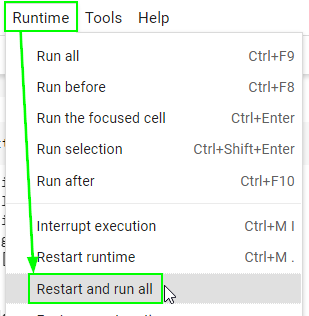

In [48]:
print('🎯 Restart and run all successful')

🎯 Restart and run all successful


In [49]:
# GRADER_ONLY
import os
from datetime import datetime
autograder_output_filename = f"{assignment_name}-autograder-results.csv"

netid = autograded_result["netid"]
assignment_name = autograded_result["assignment_name"]
student_score = autograded_result["student_score"]
total_available = autograded_result["total_available"]
graded_time = datetime.now().strftime("%Y-%m-%d %H:%M")
feedback = '''Assignment: {0}
NetID: {1}
Total Score: {2}/{3}

Grade Breakdown'''.format(assignment_name, netid, student_score, total_available)

for graded_part_name in autograded_result["order"]:
    part_info = autograded_result["breakdown"][graded_part_name]
    feedback += '''
--------------------------------
Component: {0}
Result: {1}
Score: {2}/{3}'''.format(graded_part_name, "Pass" if part_info["did_pass"] else "Fail", part_info["points"], part_info["available_points"])

    feedback += "" if part_info["did_pass"] else f"\nError Message: {part_info['message']}"

if is_autograder_env:
    df_agr_new = pd.DataFrame([{
        "netid": netid,
        "assignment_name": assignment_name,
        "student_score": student_score,
        "total_available": total_available,
        "graded_time": graded_time,
        "feedback": feedback
    }])
    
    if not os.path.exists(autograder_output_filename):
        df_agr = df_agr_new
    else:
        df_agr = pd.read_csv(autograder_output_filename)
        df_agr = df_agr.loc[~((df_agr["netid"] == netid) & (df_agr["assignment_name"] == assignment_name))]
        df_agr = pd.concat([df_agr, df_agr_new])
        
    df_agr.sort_values("graded_time").to_csv(autograder_output_filename, index=None)